In [1]:
import tensorflow as tf
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
from keras import *
from keras.src.layers import Dense, LeakyReLU, Dropout
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Data read in

image_size = (512, 512)
batch_size = 10

train_data, val_data = keras.utils.image_dataset_from_directory(
    "C:/Users/esteb/Documents/GitHub/Project-2.2_Group-14/src/main/java/com/example/g14/Data/ART",
    labels="inferred",
    validation_split=0.2,
    subset="both",
    seed=1354,
    color_mode="rgb",
    image_size=image_size,
    batch_size=batch_size,
)


def normalize_data(data, label):
    data = tf.cast(data, tf.float32) / 255.0
    return data, label

print("Training Classes:")
class_names = train_data.class_names
print(class_names)

train_data = train_data.map(normalize_data)
val_data = val_data.map(normalize_data)

Found 18618 files belonging to 2 classes.
Using 14895 files for training.
Using 3723 files for validation.
Training Classes:
['AI_GENERATED', 'NON_AI_GENERATED']


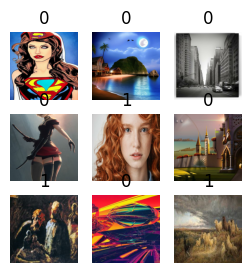

In [3]:
# Data Visualization

plt.figure(figsize=(3, 3))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [4]:

""" def residual_block(x, filters, kernel_size=3):
    shortcut = x
    
    out = keras.layers.Conv2D(filters, kernel_size, padding='same')(x)
    out = keras.layers.BatchNormalization()(out)
    out = keras.layers.Activation('relu')(out)
    
    out  = keras.layers.Conv2D(filters, kernel_size, padding='same')(out)
    out = keras.layers.BatchNormalization()(out)
    
    if downsample: #x.shape[-1] != shortcut.shape[-1]
        #shortcut = keras.layers.Conv2D(filters, 1)(shortcut)
        #shortcut = keras.layers.BatchNormalization()(shortcut)
        shortcut = keras.layers.Conv2D(filters, 1, strides=(2, 2), padding='same')(shortcut)
        shortcut = keras.layers.BatchNormalization()(shortcut)
        #shortcut = keras.layers.MaxPooling2D((2, 2))(x) 
    
    out = keras.layers.add([shortcut, out])
    out = keras.layers.Activation('relu')(out)
    return out """


def residual_block(x, filters, kernel_size=3):
    shortcut = x
    x = keras.layers.Conv2D(filters, kernel_size, padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    
    x = keras.layers.Conv2D(filters, kernel_size, padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    
    if x.shape[-1] != shortcut.shape[-1]:
        shortcut = keras.layers.Conv2D(filters, 1)(shortcut)
        shortcut = keras.layers.BatchNormalization()(shortcut)
    
    x = keras.layers.add([shortcut, x])
    x = keras.layers.Activation('relu')(x)
    return x

inputs = keras.Input(shape=(512, 512, 3))

#Initial Convolutional layer
x = keras.layers.Conv2D(32, (3, 3), padding='same')(inputs)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

#Redisual blocks
x = residual_block(x, 64)
x = keras.layers.MaxPooling2D((2, 2))(x) #downsample
x = residual_block(x, 128)
#dropout layer
x = keras.layers.Dropout(0.25)(x)

x = residual_block(x, 256)
x = residual_block(x, 512)


#Output and global average
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.25)(x)

outputs = keras.layers.Dense(1, activation='sigmoid')(x)

# Create the model
model = keras.Model(inputs, outputs)

model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy'])

In [5]:
epochs = 20

callbacks = [
    keras.callbacks.ModelCheckpoint("ART_ResNet_save_at_{epoch}.keras"),
]

history = model.fit(
    train_data,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_data,
)

Epoch 1/20


C:\Users\esteb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\backend\tensorflow\nn.py:674: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1490/1490 ━━━━━━━━━━━━━━━━━━━━ 13244s 9s/step - accuracy: 0.7051 - loss: 0.6110 - val_accuracy: 0.7499 - val_loss: 0.6432
Epoch 2/20
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 13240s 9s/step - accuracy: 0.8490 - loss: 0.3717 - val_accuracy: 0.8627 - val_loss: 0.3634
Epoch 3/20
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 13614s 9s/step - accuracy: 0.8782 - loss: 0.3143 - val_accuracy: 0.8509 - val_loss: 0.4303
Epoch 4/20
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 13496s 9s/step - accuracy: 0.8945 - loss: 0.2756 - val_accuracy: 0.9181 - val_loss: 0.2306
Epoch 5/20
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 13503s 9s/step - accuracy: 0.8997 - loss: 0.2543 - val_accuracy: 0.9175 - val_loss: 0.2186
Epoch 6/20
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 13723s 9s/step - accuracy: 0.9062 - loss: 0.2430 - val_accuracy: 0.8421 - val_loss: 0.3594
Epoch 7/20
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 13567s 9s/step - accuracy: 0.9060 - loss: 0.2313 - val_accuracy: 0.8952 - val_loss: 0.2752
Epoch 8/20
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 13335s 9s/step - accuracy: 0.9110 - lo

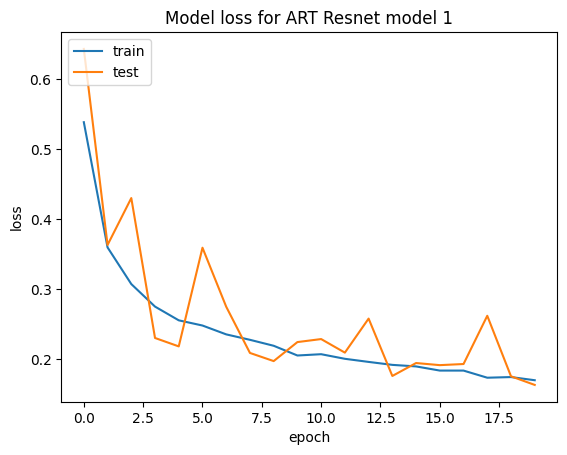

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss for ART Resnet model 1')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

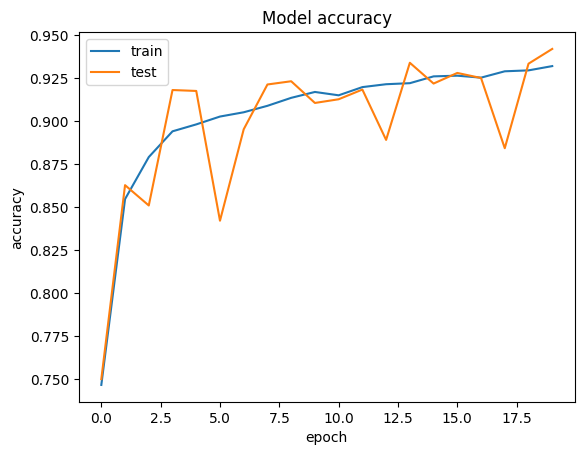

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()